In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

import helpers
from model import Unet

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

## Prepare dataset

In [5]:
DATA_PATH   = "C:/Users/roboj/Desktop/DP/data/pancreas/"
IMAGE_SIZE  = (256, 256)
BUFFER_SIZE = 1000

image_paths, mask_paths = helpers.load_image_and_mask_paths(DATA_PATH)
image_paths, mask_paths = image_paths[-20:], mask_paths[-20:] # TODO
dataset = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))
dataset = dataset.map(helpers.load_images_and_masks(IMAGE_SIZE))
train_ds, val_ds = helpers.split(dataset, 0.8)

TRAIN_LENGTH    = train_ds.cardinality().numpy()
VAL_LENGTH      = val_ds.cardinality().numpy()
# TEST_LENGTH     = test_ds.cardinality().numpy()
BATCH_SIZE      = 1
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
NUM_EPOCHS      = 10
VAL_STEPS       = VAL_LENGTH // BATCH_SIZE
# VAL_SUBSPLITS   = 5 # TODO
# VAL_STEPS       = VAL_LENGTH // BATCH_SIZE // VAL_SUBSPLITS # TODO

In [6]:
print(f"TRAIN: {TRAIN_LENGTH}\nVAL: {VAL_LENGTH}")
# print(f"TRAIN: {TRAIN_LENGTH}\nVAL: {VAL_LENGTH}\nTEST: {TEST_LENGTH}")

TRAIN: 16
VAL: 4


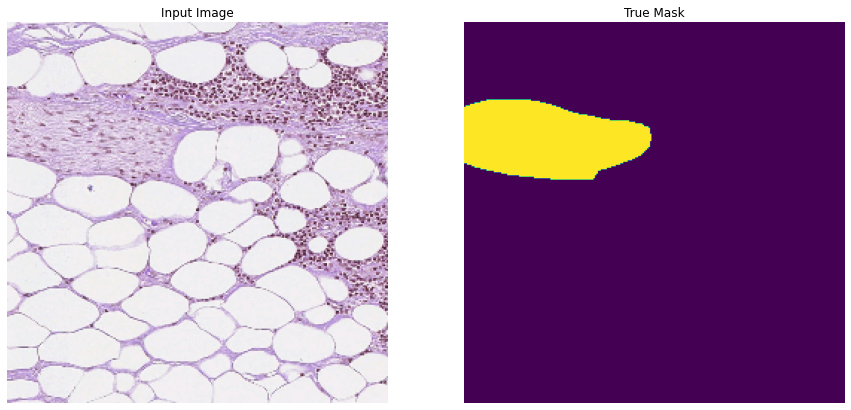

In [7]:
image, mask = next(iter(dataset))
helpers.show(image, mask)

In [8]:
# TODO: Upgrade this: https://www.tensorflow.org/guide/data
train_batches = (train_ds.shuffle(BUFFER_SIZE)
                         .batch(BATCH_SIZE)
                         .repeat()
                         # .map(Augment())
                         .prefetch(buffer_size=tf.data.AUTOTUNE))
val_batches = val_ds.batch(BATCH_SIZE)

In [9]:
unet_model = Unet().build_unet_model()
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss="bce",
                   metrics=tf.keras.metrics.MeanIoU(num_classes=2))
# unet_model.summary()

1/1 [==============================] - 2s 2s/step


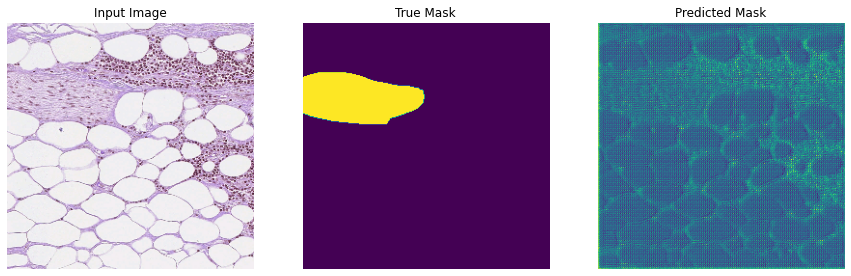

In [10]:
helpers.show_prediction(unet_model, image, mask)

In [11]:
model_history = unet_model.fit(train_batches,
                               epochs=NUM_EPOCHS,
                               #steps_per_epoch=STEPS_PER_EPOCH,
                               #validation_steps=VAL_STEPS,
                               validation_data=val_batches)
                               #callbacks=[DisplayCallback()])

Epoch 1/10
  1/160 [..............................] - ETA: 29:49 - loss: 0.7035 - mean_io_u: 0.4631

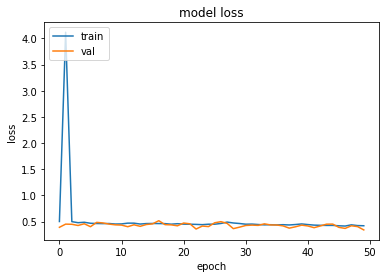

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [55]:
loss, mean_iou = unet_model.evaluate(val_batches)
print(f"Loss: {loss}\nMean_IoU: {mean_iou}")

226/226 [==============================] - 75s 233ms/step - loss: 0.4044 - mean_io_u_1: 0.4076
Loss: 0.4043962061405182
Mean_IoU: 0.40761545300483704


1/1 [==============================] - 0s 83ms/step


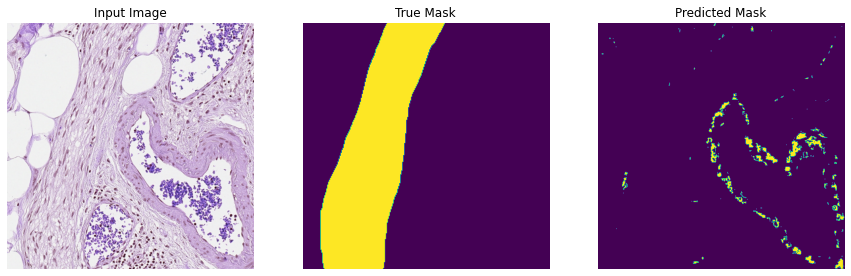

1/1 [==============================] - 0s 63ms/step


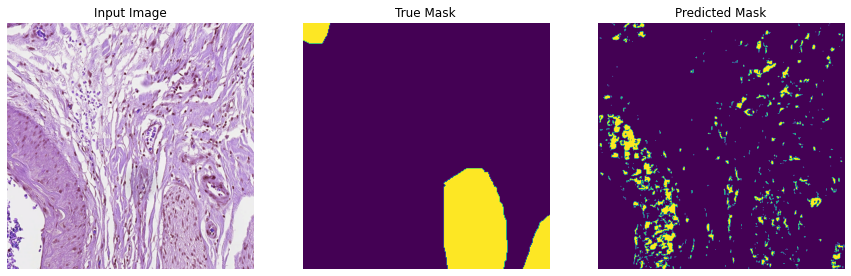

1/1 [==============================] - 0s 85ms/step


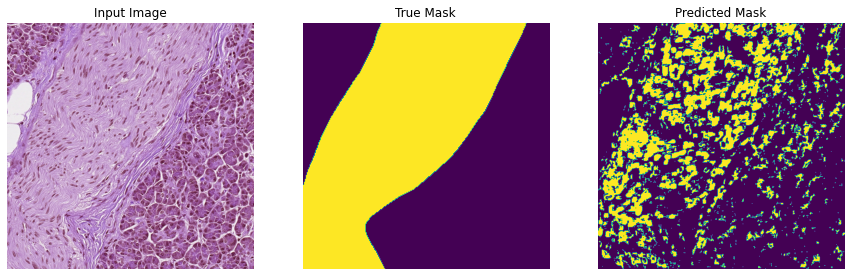

1/1 [==============================] - 0s 76ms/step


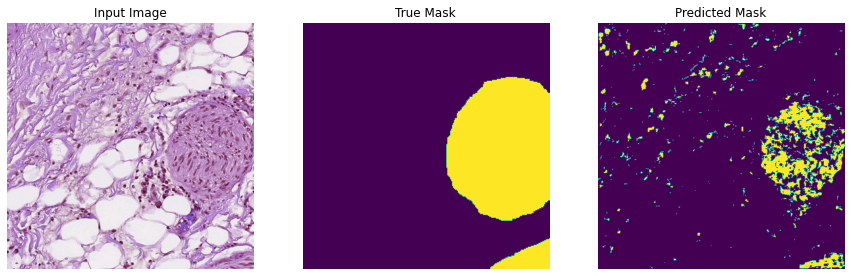

1/1 [==============================] - 0s 59ms/step


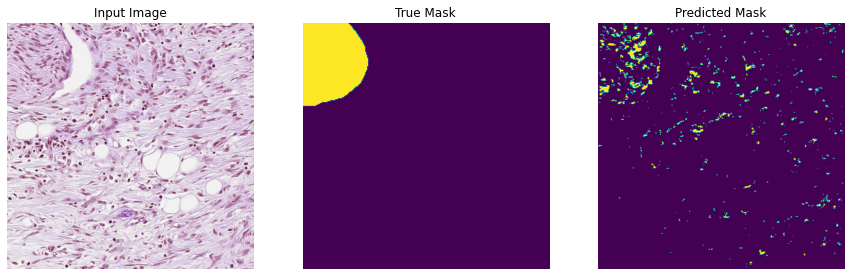

1/1 [==============================] - 0s 87ms/step


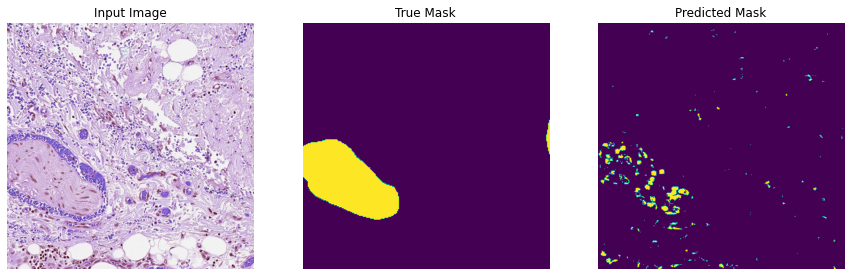

1/1 [==============================] - 0s 51ms/step


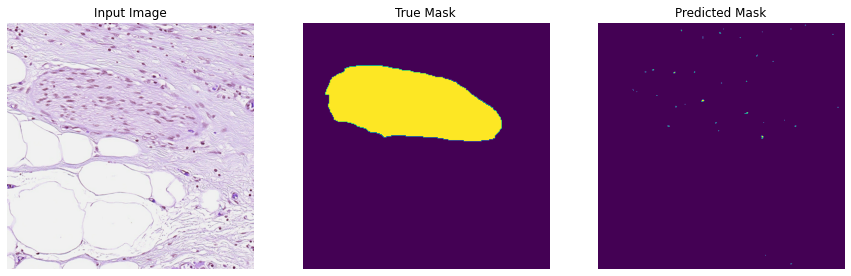

1/1 [==============================] - 0s 80ms/step


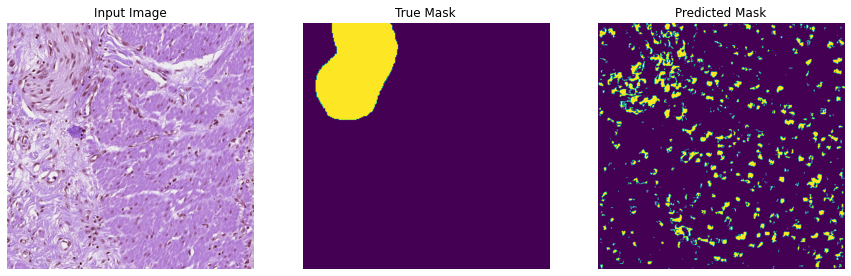

1/1 [==============================] - 0s 52ms/step


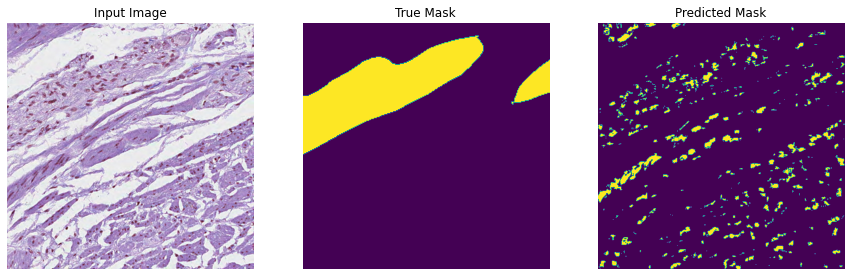

1/1 [==============================] - 0s 63ms/step


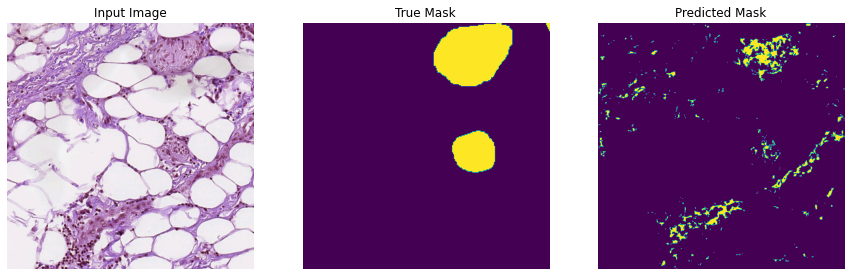

In [56]:
show_predictions(val_batches, 10, binary=True)